This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Deep learning for text

This chapter will cover:

* Preprocessing text data for machine learning
applications
* Bag-of-words approaches and sequence-modeling
approaches for text processing
* The Transformer architecture
* Sequence-to-sequence learning

## Natural-language processing: The bird's eye view

In  computer  science,  we  refer  to  human  languages,  like  English  or  Mandarin,  as “natural”  languages,  to  distinguish  them  from  languages  that  were  designed  for machines,  like  Assembly,  LISP,  or  XML.  Every  machine  language  was *designed*:  its starting point was a human engineer writing down a set of formal rules to describe
what statements you could make in that language and what they meant. Rules came first,  and  people  only  started  using  the  language  once  the  rule  set  was  complete. With human language, it's the reverse: usage comes first, rules arise later. Natural language  was  shaped  by  an  evolution  process,  much  like  biological  organisms—
that's what makes it “natural.” Its “rules,” like the grammar of English, were formalized  after  the fact  and are  often  ignored or  broken  by its  users. As  a  result,  while machine-readable language is highly structured and rigorous, using precise syntactic
rules to weave together exactly defined concepts from a fixed vocabulary, natural language is messy—ambiguous, chaotic, sprawling, and constantly in flux.

Creating  algorithms  that  can  make  sense  of  natural  language  is  a  big  deal:  language,  and  in  particular  text,  underpins  most  of  our  communications  and  our  cultural production. The internet is mostly text. Language is how we store almost all of our knowledge. Our very thoughts are largely built upon language. However, the ability  to  understand  natural  language  has  long  eluded  machines.  Some  people  once naively thought that you could simply write down the “rule set of English,” much like one can write down the rule set of LISP. Early attempts to build natural language processing (NLP) systems were thus made through the lens of “applied linguistics.” Engineers and linguists would handcraft complex  sets of rules to perform basic machine
translation  or  create  simple  chatbots—like  the  famous  ELIZA  program  from  the 1960s, which used pattern matching to sustain very basic conversation. But language is a  rebellious  thing:  it's  not  easily  pliable  to  formalization.  After  several  decades  of
effort, the capabilities of these systems remained disappointing.

Handcrafted  rules  held  out  as  the  dominant  approach  well  into  the  1990s.  But  starting in the late 1980s, faster computers and greater data availability started making a better alternative viable. When you find yourself building systems that are big piles of ad hoc rules, as a clever engineer, you're likely to start asking: “Could I use a corpus of  data  to  automate  the  process  of  finding  these  rules?  Could  I  search  for  the  rules within some kind of rule space, instead of having to come up with them myself?” And just like that, you've graduated to doing machine learning. And so, in the late 1980s, we started seeing machine learning approaches to natural language processing. The earliest  ones  were  based  on  decision  trees—the  intent  was  literally  to  automate  the development  of  the  kind  of  if/then/else  rules  of  previous  systems.  Then  statistical
approaches started gaining speed, starting with logistic regression. Over time, learned parametric models fully took over, and linguistics came to be seen as more of a hindrance than a useful tool. Frederick Jelinek, an early speech recognition researcher, joked in the 1990s: “Every time I fire a linguist, the performance of the speech recognizer goes up.

That's  what  modern  NLP  is  about:  using  machine  learning  and  large  datasets  to  give computers the ability not to *understand* language, which is a more lofty goal, but to ingest a piece of language as input and return something useful, like predicting the following:

* “What's the topic of this text?” (text classification)
* “Does this text contain abuse?” (content filtering)
* “Does this text sound positive or negative?” (sentiment analysis)
* “What should be the next word in this incomplete sentence?” (language modeling)
* “How would you say this in German?” (translation)
* “How would you summarize this article in one paragraph?” (summarization)
* etc.

Of course, keep in mind throughout this chapter that the text-processing models you will train won't possess a human-like understanding of language; rather, they simply look for statistical regularities in their input data, which turns out to be sufficient to perform well on many simple tasks. In much the same way that computer vision is pattern recognition applied to pixels, NLP is pattern recognition applied to words, sentences, and paragraphs.

The  toolset  of  NLP—decision  trees,  logistic  regression—only  saw  slow  evolution from the 1990s to the early 2010s. Most of the research focus was on feature engineering.  When  I  won  my  first  NLP competition  on  Kaggle  in  2013,  my  model  was,  you guessed  it,  based  on  decision  trees  and  logistic  regression.  However,  around  2014—2015,  things  started  changing  at  last.  Multiple  researchers  began  to  investigate  the language-understanding capabilities of recurrent neural networks, in particular LSTM—
a sequence-processing algorithm from the late 1990s that had stayed under the radar until then.

In early 2015, Keras made available the first open source, easy-to-use implementation of LSTM, just at the start of a massive wave of renewed interest in recurrent neural networks—until then, there had only been “research code” that couldn't be readily reused. Then from 2015 to 2017, recurrent neural networks dominated the booming NLP scene. Bidirectional LSTM models, in particular, set the state of the art on many important tasks, from summarization to question-answering to machine translation.

Finally,  around  2017—2018,  a  new  architecture  rose  to  replace  RNNs:  the  Transformer,  which  you  will  learn  about  in  the  second  half  of  this  chapter.  Transformers unlocked considerable progress across the field in a short period of time, and today
most NLP systems are based on them.

Let's dive into the details. This chapter will take you from the very basics to doing machine translation with a Transformer.

## Preparing text data

Deep learning models, being differentiable functions, can only process numeric tensors:  they  can't  take  raw  text  as  input. *Vectorizing*  text  is  the  process  of  transforming
text  into  numeric  tensors.  Text  vectorization  processes  come  in  many  shapes  and forms, but they all follow the same template (see figure below):

* First, you *standardize* the text to make it easier to process, such as by converting it to lowercase or removing punctuation.
* You split the text into units (called *tokens*), such as characters, words, or groups of words. This is called *tokenization*.
* You convert each such token into a numerical vector. This will usually involve first *indexing* all tokens present in the data.

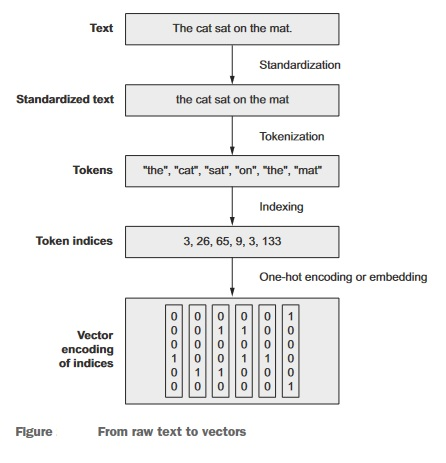

TODO: What are tken indices?

Let's review each of these steps.

### Text standardization

Consider these two sentences:

* “sunset came. i was staring at the Mexico sky. Isnt nature splendid??”
* “Sunset came; I stared at the México sky. Isn't nature splendid?”

TODO: Define byte strings!

They're very similar—in fact, they're almost identical. Yet, if you were to convert them to byte strings, they would end up with very different representations, because “i” and “I” are two different characters, “Mexico” and “México” are two different words, “isnt” isn't “isn't,” and so on. A machine learning model doesn't know a priori that “i” and
“I” are the same letter, that “é” is an “e” with an accent, or that “staring” and “stared” are two forms of the same verb.

Text  standardization  is  a  basic  form  of  feature  engineering  that  aims  to  erase  encoding  differences  that  you  don't  want  your  model  to  have  to  deal  with.  It's  not exclusive  to  machine  learning,  either—you'd  have  to  do  the  same  thing  if  you  were building a search engine.

One of the simplest and most widespread standardization  schemes is “convert to lowercase and remove punctuation characters.” Our two sentences would become

* “sunset came i was staring at the mexico sky isnt nature splendid”
* “sunset came i stared at the méxico sky isnt nature splendid”

Much closer already. Another common transformation is to convert special characters to a standard form, such as replacing “é” with “e,” “æ” with “ae,” and so on. Our token “méxico” would then become “mexico”.

Lastly, a much more advanced standardization pattern that is more rarely used in a machine learning context is *stemming*: converting variations of a term (such as different  conjugated  forms  of  a  verb)  into  a  single  shared  representation,  like  turning “caught”  and  “been  catching”  into  “[catch]”  or  “cats”  into  “[cat]”.  With  stemming,
“was staring” and “stared” would become something like “[stare]”, and our two similar sentences would finally end up with an identical encoding:

* “sunset came i [stare] at the mexico sky isnt nature splendid”

With these standardization techniques, your model will require less training data and will  generalize  better—it won't  need  abundant  examples of  both  “Sunset”  and  “sunset” to learn that they mean the same thing, and it will be able to make sense of “México” even if it has only seen “mexico” in its training set. Of course, standardization may
also  erase  some  amount  of  information,  so  always  keep  the  context  in  mind:  for instance,  if  you're  writing  a  model  that  extracts  questions  from  interview  articles,  it should definitely treat “?” as a separate token instead of dropping it, because it's a use
ful signal for this specific task.

* TODO: Explain escape characters.
* TODO: Talk about how strings like "é" and "e" are saved in memory with the IEEE (?) standard.

### Text splitting (tokenization)

### Vocabulary indexing

### Using the TextVectorization layer

In [ ]:
import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

In [ ]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)

In [ ]:
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",
)

In [ ]:
import re
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

In [ ]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
text_vectorization.adapt(dataset)

**Displaying the vocabulary**

In [ ]:
text_vectorization.get_vocabulary()

In [ ]:
vocabulary = text_vectorization.get_vocabulary()
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = text_vectorization(test_sentence)
print(encoded_sentence)

In [ ]:
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)

## Two approaches for representing groups of words: Sets and sequences

### Preparing the IMDB movie reviews data

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

In [ ]:
!rm -r aclImdb/train/unsup

In [ ]:
!cat aclImdb/train/pos/4077_10.txt

In [ ]:
import os, pathlib, shutil, random

base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)

In [ ]:
from tensorflow import keras
batch_size = 32

train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)

**Displaying the shapes and dtypes of the first batch**

In [ ]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

### Processing words as a set: The bag-of-words approach

#### Single words (unigrams) with binary encoding

**Preprocessing our datasets with a `TextVectorization` layer**

In [ ]:
text_vectorization = TextVectorization(
    max_tokens=20000,
    output_mode="multi_hot",
)
text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

**Inspecting the output of our binary unigram dataset**

In [ ]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

**Our model-building utility**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

**Training and testing the binary unigram model**

In [ ]:
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_1gram.keras",
                                    save_best_only=True)
]
model.fit(binary_1gram_train_ds.cache(),
          validation_data=binary_1gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

#### Bigrams with binary encoding

**Configuring the `TextVectorization` layer to return bigrams**

In [ ]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

**Training and testing the binary bigram model**

In [ ]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
                                    save_best_only=True)
]
model.fit(binary_2gram_train_ds.cache(),
          validation_data=binary_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

#### Bigrams with TF-IDF encoding

**Configuring the `TextVectorization` layer to return token counts**

In [ ]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="count"
)

**Configuring `TextVectorization` to return TF-IDF-weighted outputs**

In [ ]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf_idf",
)

**Training and testing the TF-IDF bigram model**

In [ ]:
text_vectorization.adapt(text_only_train_ds)

tfidf_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
                                    save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

In [ ]:
inputs = keras.Input(shape=(1,), dtype="string")
processed_inputs = text_vectorization(inputs)
outputs = model(processed_inputs)
inference_model = keras.Model(inputs, outputs)

In [ ]:
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."],
])
predictions = inference_model(raw_text_data)
print(f"{float(predictions[0] * 100):.2f} percent positive")